# Лабораторная работа №2. Быстрое преобразование Фурье. Вычисление дискретной свертки
## Цель работы
Изучить алгоритм быстрого преобразования Фурье (БПФ) и убедиться в
ускорении вычислений при его использования.

## Задание


### 1.
Реализовать на С или С++ алгоритмы непосредственного вычисления ДПФ и
ОДПФ по формулам (1) и (2) для комплексного входного сигнала с двойной
точностью (double). Входные данные загружать из текстового файла
(разделитель – пробел), сгенерированного, например, в MATLAB.



### 2.

Реализовать на С или С++ алгоритмы прямого и обратного БПФ для
комплексного входного сигнала длиной 2n , n – любое натуральное число:

г) с прореживанием по частоте без двоично-инверсных перестановок
(вариант 4);

### 3.
 Убедиться в корректности работы алгоритмов:

а) проверить выполнение равенства $X = ОДПФ(ДПФ(X))$, а также равенства
$X = ОБПФ(БПФ(X))$;

б) сравнить результаты $ДПФ(Х)$ и $БПФ(Х)$;

в) сравнить результаты работы реализованного алгоритма, например, с результатами процедуры fft, встроенной в MATLAB.

In [2]:
import numpy as np
def write(n,filename):
    """
    Функция для генерация текстового файла с помощью python для тестрирования ДПФ,БПФ,ОДПФ,ОБПФ.
    Принимает 2 аргумента: n - размер массива, filename - название файла без расширения, куда будут записаны данные.
    """
    signal=[]
    for i in range(n):
        signal.append(np.random.uniform(-10,10,2))
    with open(f"..\TextFiles\{filename}.txt",'w') as f:
        for el in signal:
            f.write(f"{el[0]} {el[1]}\n")

            
def read(filename):
    x=[]
    with open(f"..\TextFiles\{filename}.txt", 'r') as file:
        for line in file:
            new_line = line.split(" ")
            x.append(complex(float(new_line[0]), float(new_line[1])))
    return x


def error(x,y):
    err=0
    for i in range(len(x)):
        err += abs((x[i] - y[i])**2)
    return err

In [51]:
# Генерация файлов для заданий 3,7
write(16,"ex3")
write(16,"ex7_1")
write(16,"ex7_2")

Вывод программы для пунктов А,Б

```
A)
MSE between original and RDFT(DFT(X)) = 1.9779e-13

B)
MSE between original and RFFT(FFT(X)) = 3.65341e-29
```

Сравнение FFT, реализованного на *c++* и *scipy.fft.fft*

In [17]:
import scipy as sc
x=read("ex3")
y_python=sc.fft.fft(x,norm="ortho")
y_cpp=read("CppFFT")

print("MSE between scipy.fft.fft and my FFT = ",error(y_python,y_cpp))

MSE between scipy.fft.fft and my FFT =  9.319651603777159e-15


### 4.
Проанализировать зависимость времени выполнения БПФ и непосредственного
вычисления ДПФ от длины N преобразования.

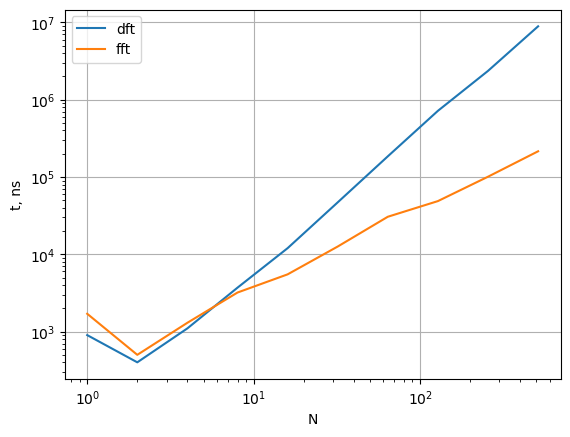

In [7]:
import matplotlib.pyplot as plt
time_dft=read("time_dft")
time_fft=read("time_fft")
time1,time2,num=[],[],[]
for i in range(len(time_dft)):
    time1.append(time_dft[i].imag)
    time2.append(time_fft[i].imag)
    num.append(2**i)

plt.loglog(num,time1, label="dft")
plt.loglog(num,time2, label="fft")
plt.legend()
plt.xlabel("N")
plt.ylabel("t, ns")
plt.grid()

Этот график получен, путем выполнения программы в VS с включенным Release. По какойто причине при компиляции с помощью g++ и запуском через консоль очень сильно падает производительность.

### 5.
 Реализовать на С или С++ процедуру прямого вычисления свертки двух
последовательностей по формуле (3). Входные данные загружать из текстового
файла (разделитель – пробел), сгенерированного, например, в MATLAB.

### 6.
 Реализовать процедуру нахождения дискретной свертки, основанную на БПФ.
При вычислении БПФ использовать результаты п. 2 задания.

### 7.
Убедится в корректности работы процедуры из п. 5 и п. 6 задания, сравнив
полученные результаты с результатами работы встроенной функций MATLAB
conv.

In [53]:
conv = read("CppCONV")
fconv = read("CppFCONV")
a=read("ex7_1")
b=read("ex7_2")
conv_python=np.convolve(a,b)

print("MSE between CONV and FCONV = ",error(conv,fconv))
print("MSE between python conv and CONV = ",error(conv_python,conv))
print("MSE between python conv and FCONV = ",error(conv_python,fconv))

MSE between CONV and FCONV =  1.3306384888227549e-11
MSE between python conv and CONV =  5.008635659429248e-26
MSE between python conv and FCONV =  1.3306385097453587e-11


Как можно заметить, вычисление свертки при помощи БПФ точнее чем прямое и почти совпадает с функцией *python*

### 8.
 Сравнить производительность алгоритмов вычисления свертки по определению (3) и с помощью БПФ в двух случаях: когда размер одной из последовательностей фиксирован, и когда меняются длины обеих
последовательностей.

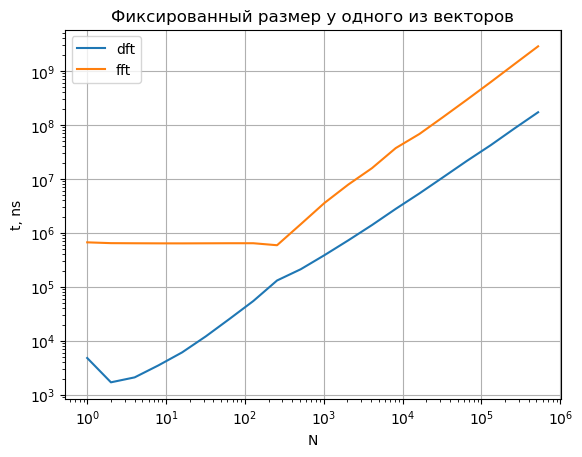

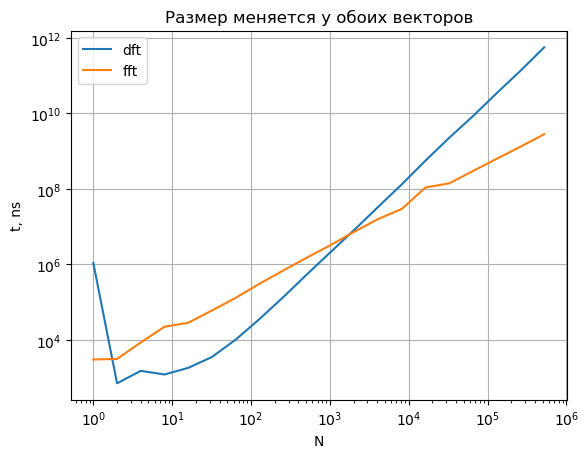

In [4]:
import matplotlib.pyplot as plt
time_conv1=read("time_conv1")
time_conv2=read("time_conv2")
time_fconv1=read("time_fconv1")
time_fconv2=read("time_fconv2")
time1,time2,time3,time4,num=[],[],[],[],[]
for i in range(len(time_conv1)):
    time1.append(time_conv1[i].imag)
    time2.append(time_conv2[i].imag)
    time3.append(time_fconv1[i].imag)
    time4.append(time_fconv2[i].imag)
    num.append(2**i)

plt.loglog(num,time1, label="dft")
plt.loglog(num,time3, label="fft")
plt.legend()
plt.xlabel("N")
plt.ylabel("t, ns")
plt.title("Фиксированный размер у одного из векторов")
plt.grid()

plt.figure()
plt.loglog(num,time2, label="dft")
plt.loglog(num,time4, label="fft")
plt.legend()
plt.xlabel("N")
plt.ylabel("t, ns")
plt.title("Размер меняется у обоих векторов")
plt.grid()

На втором графике можно заметить, что зависимости времени выполнения для *CONV* и *FCONV* от количества элементов в векторе напоминают графики $N^2$ и $N*log(N)$, что и является теоретической оценкой их сложности